# ITPR1
Pathogenic variation in the ITPR1 gene is associated with

[Gillespie syndrome (GLSP)](https://omim.org/entry/206700), 
[spinocerebellar ataxia-15 (SCA15)](https://omim.org/entry/606658), and
[spinocerebellar ataxia-29 (SCA29)](https://omim.org/entry/117360).

Pathological variants associated with SCA29 have been shown to fall into several mechanistic classes.

- R241K, T267M, T267R, R269G, R269W, S277I, K279E, A280D, E497K: Impair IP3 binding to ITPR1 ([Ando et al. 2018](https://pubmed.ncbi.nlm.nih.gov/30429331/))
- In contrast, V479I, T579I, and N587D did not affect IP3 binding ([Ando et al. 2018](https://pubmed.ncbi.nlm.nih.gov/30429331/))
- Disrupt ITPR1 channel activity without impairing IP3 binding: T579I, N587D ([Ando et al. 2018](https://pubmed.ncbi.nlm.nih.gov/30429331/))
- Two pathological variants, S1478D and V1538M, are located within the CA8 binding site. V1538M completely abolished CA8 binding. Both variants abolish CA8-mediated suppression of ITPR1 activity ([Ando et al. 2018](https://pubmed.ncbi.nlm.nih.gov/30429331/)). V1538M was identified in an individual with SCA29 and S1478D was found in an individual with ataxic cerebral palsy.


    We will follow [Tolonen et al. (2024)](https://pubmed.ncbi.nlm.nih.gov/37964426/) and divide the sequence encoded by NM_001378452.1 (9908nt; 2758 aa) into 
    - Suppresor domain (1-223)
    - IP3 binding: 226-578
    - Regulatory/Coupling: 605-2217
    - Channel: 2227-2758 


In [1]:
import gpsea
import hpotk
from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.4.1.dev0


In [17]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator

cohort_name = "ITPR1"	
"""
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.18') as ps:
        phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
from gpsea.preprocessing import configure_caching_cohort_creator
"""

cohort_creator = configure_caching_cohort_creator(hpo)
from gpsea.preprocessing import load_phenopacket_folder
pp_dir = '/Users/robin/GIT/phenopacket-store/notebooks/ITPR1/phenopackets/'
cohort, qc_results = load_phenopacket_folder(pp_dir, cohort_creator)  





Individuals Processed: 170individuals [00:22,  7.59individuals/s]


In [18]:
qc_results.summarize()


Validated under none policy
No errors or warnings were found


In [19]:
ITPR1_MANE_transcript = 'NM_001378452.1'
ITPR1_protein_id = 'NP_001365381.1' # Homo sapiens inositol 1,4,5-trisphosphate receptor type 1 (ITPR1), transcript variant 4, mRNA

In [20]:
from gpsea.view import CohortViewable
cv = CohortViewable(hpo=hpo)
report = cv.process(cohort=cohort, transcript_id=ITPR1_MANE_transcript)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Ataxia,HP:0001251,83
Hypotonia,HP:0001252,75
Nystagmus,HP:0000639,57
Delayed ability to sit,HP:0025336,56
Dysarthria,HP:0001260,54
Delayed ability to walk,HP:0031936,54
Delayed speech and language development,HP:0000750,53
Global developmental delay,HP:0001263,49
Cerebellar atrophy,HP:0001272,47
Dysmetria,HP:0001310,32


In [21]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(ITPR1_MANE_transcript)

In [22]:
protein_meta = pms.annotate(ITPR1_protein_id)

In [23]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=ITPR1_MANE_transcript)
report = viewer.process(cohort)
display(HTML(report))

Variant key,Variant (cDNA),Variant (protein),Effects,Count
SO:1000029_HGNC:6180_ITPR1,SV involving ITPR1,p.?,chromosomal deletion,19
3_4706193_4706193_G_A,c.4684G>A,p.Val1562Met,missense,17
3_4645678_4645678_C_T,c.805C>T,p.Arg269Trp,missense,14
3_4645673_4645673_C_T,c.800C>T,p.Thr267Met,missense,14
3_4814521_4814521_G_A,c.7660G>A,p.Gly2554Arg,missense,10
3_4815176_4815179_CAGA_C,c.7831_7833del,p.Lys2611del,inframe deletion,8
3_4735314_4735314_T_C,c.5504T>C,p.Leu1835Pro,missense,6
3_4521037_4521037_C_T,c.106C>T,p.Arg36Cys,missense,5
3_4667467_4667467_A_G,c.1804A>G,p.Asn602Asp,missense,4
3_4645696_4645696_G_A,c.823G>A,p.Ala275Thr,missense,3


In [27]:
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(ITPR1_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(ITPR1_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

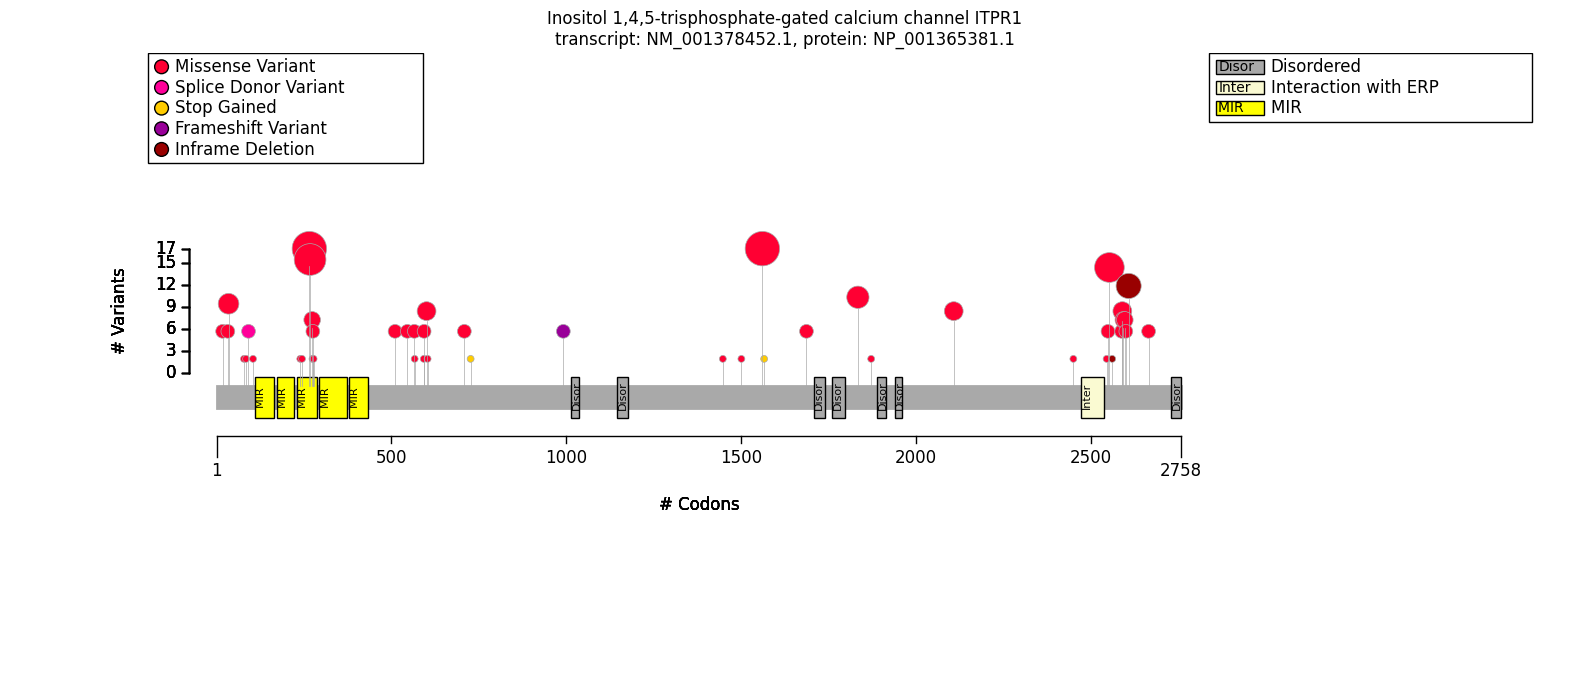

In [28]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);
drawer

# Hypothesis

  We will follow [Tolonen et al. (2024)](https://pubmed.ncbi.nlm.nih.gov/37964426/) and divide the sequence encoded by NM_001378452.1 (9908nt; 2758 aa) into 
  
    - Suppresor domain (1-223)
    - IP3 binding: 226-578
    - Regulatory/Coupling: 605-2217
    - Channel: 2227-2758 

The authors state: The distribution of variants across different domains of the IP3R1 protein suggests both loss-of-function (LOF) and gain-of-function (GOF) disease mechanisms (Fig. 2) with important implications for therapeutic development. The majority of SCA29 and GLSP cases harbor variants in the IP3-binding and channel domains.

N-Terminal variants are solely associated with SCA29, while C-terminal variants can cause either GLSP (p.Gly2554Arg and p.Lys2611del) or SCA29.

We will also test structural variants against missense variants for association with SCA15.

In [31]:
from gpsea.analysis.predicate.genotype import VariantPredicates
from gpsea.model.genome import Region
ip3_region_pred = VariantPredicates.region(region=Region(start=225, end=578), tx_id=ITPR1_MANE_transcript)

In [33]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import  groups_predicate, VariantPredicates

vp = VariantPredicates.variant_key("3_4645673_4645673_C_T") | VariantPredicates.variant_key("3_4645678_4645678_C_T")



# The following variants are at or very near IP3 binding pocket
variant_keys = ('3_4645673_4645673_C_T',  ## p.Thr267Met	
                '3_4645673_4645673_C_G', #p.Thr267Arg
                '3_4645678_4645678_C_T', #	p.Arg269Trp'
                '3_4665283_4665283_A_G',#	p.Tyr567Cys
                '3_4663186_4663186_G_A', #	p.Glu512Lys	missense
                '3_4665285_4665285_A_G',#	p.Arg568Gly	missense
                )
compound = VariantPredicates.any(VariantPredicates.variant_key(key) for key in variant_keys)

gt_predicate = groups_predicate(
    predicates=(
        ip3_region_pred,
        ~ip3_region_pred,
    ),
    group_names=('IP3 binding', 'Others'),
)
gt_predicate.display_question()

'Genotype group: IP3 binding, Others'

In [34]:
from gpsea.analysis.predicate.genotype import ModeOfInheritancePredicate

gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(
    variant_predicate=compound,
)

/var/folders/hq/zttr8hjx127fgvh0bq7h4bc80000gn/T/ipykernel_12874/1094977128.py:3: DeprecationWarning: Use `gpsea.analysis.predicate.genotype.autosomal_dominant` instead
  gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(


In [35]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    min_n_of_patients_with_term=2,
)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo, term_frequency_threshold=0.5)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest
count_statistic = FisherExactTest()

In [12]:
"HP:0001288" in hpo

True

In [36]:
from gpsea.analysis.pcats import HpoTermAnalysis
analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [37]:
from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_report = mtc_viewer.process(result)
display(HTML(mtc_report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.5,43
HMF02,Skipping term because no genotype has more than one observed HPO count,7
HMF03,Skipping term because of a child term with the same individual counts,1
HMF04,Skipping term because all genotypes have same HPO observed proportions,35
HMF05,Skipping term because one genotype had zero observations,9
HMF06,Skipping term with less than 7 observations (not powered for 2x2),114
HMF08,Skipping general term,59


In [40]:
from gpsea.view import summarize_hpo_analysis

report = summarize_hpo_analysis(hpo=hpo, result=result)
report

What is the genotype group                          HOM_REF            HET  \
                                                      Count Percent  Count   
Slow saccadic eye movements [HP:0000514]                0/9      0%    4/4   
Motor delay [HP:0001270]                              66/92     72%  24/24   
Delayed ability to walk [HP:0031936]                  41/68     60%  13/13   
Delayed speech and language development [HP:000...    40/66     61%  13/13   
Neurodevelopmental delay [HP:0012758]                 76/96     79%  29/29   
Nystagmus [HP:0000639]                                60/88     68%  25/26   
Delayed gross motor development [HP:0002194]          60/86     70%  18/18   
Strabismus [HP:0000486]                                6/16     38%  11/12   
Spasticity [HP:0001257]                                1/12      8%    3/3   
Postural tremor [HP:0002174]                          20/48     42%    6/6   
Esodeviation [HP:0020045]                              0/10      0%    3/4   
Appendicular spasticity [HP:0034353]                   0/11      0%    2/2   
Delayed ability to walk with support [HP:0033257]      6/32     19%    3/3   
Delayed ability to sit [HP:0025336]                   45/73     62%  11/11   
Delayed ability to stand [HP:0025335]                  2/28      7%    2/2   
Slowed horizontal saccades [HP:0007885]                0/10      0%    2/2   
Hypoplasia of the iris [HP:0007676]                   21/31     68%    0/4   
Oculomotor apraxia [HP:0000657]                        3/12     25%  13/19   
Lower limb spasticity [HP:0002061]                     0/11      0%    2/3   
Myokymia [HP:0002411]                                   2/9     22%    3/3   
Hypotonia [HP:0001252]                                63/72     88%  30/30   
Dysarthria [HP:0001260]                               44/58     76%  10/10   
Tremor [HP:0001337]                                   59/69     86%  18/18   
Generalized hypotonia [HP:0001290]                     9/18     50%    5/5   
Hypertonia [HP:0001276]                                 1/4     25%    4/4   
Global developmental delay [HP:0001263]               36/61     59%  13/16   
Horizontal nystagmus [HP:0000666]                      8/37     22%    2/3   
Microcephaly [HP:0000252]                              2/12     17%    2/3   
Gaze-evoked nystagmus [HP:0000640]                    13/44     30%    4/6   
Limb ataxia [HP:0002070]                              14/26     54%    3/3   
Cerebellar hypoplasia [HP:0001321]                    14/16     88%    1/2   
Action tremor [HP:0002345]                            47/57     82%  10/10   
Cerebellar cortical atrophy [HP:0008278]              13/20     65%    0/1   
Limb dysmetria [HP:0002406]                           16/27     59%    0/1   
Hypermetropia [HP:0000540]                              3/8     38%    2/2   
Abnormal saccadic eye movements [HP:0000570]           8/11     73%    4/4   
Ataxia [HP:0001251]                                 122/126     97%  34/34   
Hyperreflexia [HP:0001347]                            14/23     61%    3/6   
Intellectual disability [HP:0001249]                  55/67     82%  16/19   
Cerebellar atrophy [HP:0001272]                       60/64     94%  21/22   
Dysmetria [HP:0001310]                                41/52     79%    7/8   
Cerebellar ataxia associated with quadrupedal g...     7/11     64%    1/1   
Cerebellar vermis atrophy [HP:0006855]                27/34     79%    4/5   
Ptosis [HP:0000508]                                     6/8     75%    3/3   
Gait ataxia [HP:0002066]                              24/32     75%    2/2   
Intention tremor [HP:0002080]                         29/40     72%    2/3   
Kinetic tremor [HP:0030186]                           29/39     74%    2/2   
Poor head control [HP:0002421]                         9/13     69%    3/4   
Cognitive impairment [HP:0100543]                       3/3    100%    3/4   
Cerebral atrophy [HP:0

In [38]:
from gpsea.analysis.predicate import PatientCategories
summary_df = result.summarize(hpo, PatientCategories.YES)
summary_df.head(45)

AttributeError: 'HpoTermAnalysisResult' object has no attribute 'summarize'

In [ ]:
report.